<a href="https://colab.research.google.com/github/bella0826/MNIST/blob/main/MNIST_torch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torchsummary import summary

In [3]:
EPOCHS = 10
BATCH_SIZE = 32
LR = 0.001
DOWNLOAD = True

In [4]:
train_data = torchvision.datasets.MNIST(root = "./mnist", train = True, transform = torchvision.transforms.ToTensor(),download = DOWNLOAD)
test_data = torchvision.datasets.MNIST(root = "./mnist", train = False, transform = torchvision.transforms.ToTensor())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [5]:
train_loader = DataLoader(dataset = train_data, batch_size = BATCH_SIZE, shuffle = True, num_workers = 2)
test_loader = DataLoader(dataset = test_data, batch_size = BATCH_SIZE)

In [16]:
class Model(nn.Module):
  def __init__(self):
    super(Model,self).__init__()  
    #input_size = (1,28,28)
    self.conv1 = nn.Sequential(
        nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    ) #output_size = (16,14,14)
    self.conv2 = nn.Sequential(
        nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
    ) #output_size = (32,7,7)
    self.fc1 = nn.Linear(32*7*7,128)
    self.fc2 = nn.Linear(128,10)
  def forward(self,x):
    out = self.conv1(x)
    out = self.conv2(out)
    out = out.view(out.size(0),-1)
    out = self.fc1(out)
    out = self.fc2(out)
    out = F.softmax(out,dim=1)
    return out

In [31]:
def train(model,train_loadertest_loader,optimizer,criterion,epochs):
  model.train()
  train_acc_his = []
  train_loss_his = []
  val_acc_his = []
  val_loss_his = []
  
  for epoch in range(1,epochs+1):
    correct_train = 0
    total_train = 0
    for idx,(data,target) in enumerate(train_loader):
      train = Variable(data)
      labels = Variable(target)
      optimizer.zero_grad()
      output = model(train)
      loss = criterion(output,labels)
      loss.backward()
      optimizer.step()
      pred = torch.max(output.data,1)[1]
      total_train += len(labels)
      correct_train += (pred == labels).float().sum()
      #if idx % 50 == 0:
       # print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(epoch, idx * len(data), len(train_loader.dataset), 100. * idx / len(train_loader), loss.item()))
    train_acc = 100 * correct_train / float(total_train)
    train_acc_his.append(train_acc)
    train_loss_his.append(loss.data)
    
    correct_val = 0
    total_val = 0
    for data,target in test_loader:
      val = Variable(data)
      output = model(val)
      val_loss = criterion(output,target)
      pred = torch.max(output.data,1)[1]
      total_val += len(target)
      correct_val += (pred == target).float().sum()
    val_acc = 100 * correct_val / float(total_val)
    val_acc_his.append(val_acc)
    val_loss_his.append(val_loss.data)
    print('Train Epoch: {}/{} Traing_Loss: {} Traing_acc: {:.6f}% Val_Loss: {} Val_accuracy: {:.6f}%'.format(epoch, EPOCHS, loss.data, train_acc, val_loss.data, val_acc))
  return train_loss_his, train_acc_his, val_loss_his, val_acc_his


In [8]:
def test(model,test_loader,criterion):
  model.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for idx,(data,target) in enumerate(test_loader):
      output = model(data)
      test_loss += criterion(output,target).item()
      pred = output.argmax(dim=1,keepdim=True)
      correct += pred.eq(target.view_as(pred)).sum().item()
  test_loss /= len(test_loader.dataset)
  print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(test_loss, correct, len(test_loader.dataset), 100. * correct / len(test_loader.dataset)))

In [32]:
cnn = Model()
optimizer = optim.Adam(cnn.parameters(),lr=LR)
criterion = nn.CrossEntropyLoss()
train_loss_his, train_acc_his, val_loss_his, val_acc_loss = train(cnn,train_loader,optimizer,criterion,EPOCHS)
test(cnn,test_loader,criterion)

Train Epoch: 1/10 Traing_Loss: 1.4733942747116089 Traing_acc: 93.013336% Val_Loss: 1.4611504077911377 Val_accuracy: 97.190002%
Train Epoch: 2/10 Traing_Loss: 1.4633806943893433 Traing_acc: 97.473335% Val_Loss: 1.4611504077911377 Val_accuracy: 97.980003%
Train Epoch: 3/10 Traing_Loss: 1.4946606159210205 Traing_acc: 97.925003% Val_Loss: 1.4611504077911377 Val_accuracy: 98.300003%
Train Epoch: 4/10 Traing_Loss: 1.4611876010894775 Traing_acc: 98.276665% Val_Loss: 1.4611504077911377 Val_accuracy: 98.510002%
Train Epoch: 5/10 Traing_Loss: 1.4914203882217407 Traing_acc: 98.378334% Val_Loss: 1.4611504077911377 Val_accuracy: 98.220001%
Train Epoch: 6/10 Traing_Loss: 1.4612751007080078 Traing_acc: 98.591667% Val_Loss: 1.4611504077911377 Val_accuracy: 98.669998%
Train Epoch: 7/10 Traing_Loss: 1.4611505270004272 Traing_acc: 98.558334% Val_Loss: 1.4611504077911377 Val_accuracy: 98.220001%
Train Epoch: 8/10 Traing_Loss: 1.4622987508773804 Traing_acc: 98.639999% Val_Loss: 1.4611504077911377 Val_accur

In [26]:
print(cnn)
summary(cnn,(1,28,28))

Model(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=1568, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 28, 28]             160
              ReLU-2           [-1, 16, 28, 28]               0
         MaxPool2d-3           [-1, 16, 14, 14]               0
            Conv2d-4           [-1, 32, 14, 14]           4,640
              ReLU-5           [-1, 32, 14, 14]               0
         MaxPoo

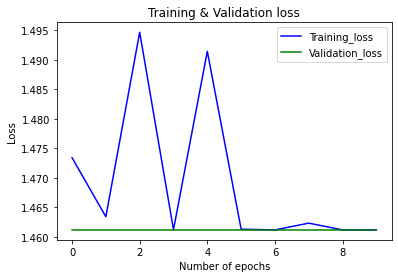

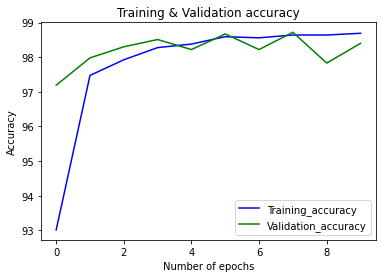

In [34]:
plt.plot(range(EPOCHS), train_loss_his, 'b-', label='Training_loss')
plt.plot(range(EPOCHS), val_loss_his, 'g-', label='Validation_loss')
plt.title('Training & Validation loss')
plt.xlabel('Number of epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
plt.plot(range(EPOCHS), train_acc_his, 'b-', label='Training_accuracy')
plt.plot(range(EPOCHS), val_acc_loss, 'g-', label='Validation_accuracy')
plt.title('Training & Validation accuracy')
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()